In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport #Uses pandas_profiling new version

#matplotlib.use('TkAgg')
%matplotlib inline
sns.set(style="whitegrid")


c:\Users\idiazl01\AppData\Local\miniconda3\envs\hc_opioid\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\idiazl01\AppData\Local\miniconda3\envs\hc_opioid\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [2]:
data = 'CaseStudy_training_data.xlsx'
df = pd.read_excel(data, sheet_name='Model_data')
df.head()

,ID,OD,Low_inc,SURG,rx ds,A,B,C,D,E,...,I,J,K,L,M,N,R,S,T,V
0,1,1,1,0,794,0,0,0,1,1,...,1,1,0,1,1,1,1,0,0,0
1,2,1,1,0,457,0,0,1,0,1,...,1,1,0,0,0,1,1,1,0,0
2,3,1,1,1,722,0,1,0,1,1,...,1,1,1,0,1,0,1,0,0,0
3,4,0,1,0,262,0,1,0,0,1,...,1,0,1,1,1,1,1,1,1,0
4,5,1,1,0,780,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,0


1. Data exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       1000 non-null   int64
 1   OD       1000 non-null   int64
 2   Low_inc  1000 non-null   int64
 3   SURG     1000 non-null   int64
 4   rx ds    1000 non-null   int64
 5   A        1000 non-null   int64
 6   B        1000 non-null   int64
 7   C        1000 non-null   int64
 8   D        1000 non-null   int64
 9   E        1000 non-null   int64
 10  F        1000 non-null   int64
 11  H        1000 non-null   int64
 12  I        1000 non-null   int64
 13  J        1000 non-null   int64
 14  K        1000 non-null   int64
 15  L        1000 non-null   int64
 16  M        1000 non-null   int64
 17  N        1000 non-null   int64
 18  R        1000 non-null   int64
 19  S        1000 non-null   int64
 20  T        1000 non-null   int64
 21  V        1000 non-null   int64
dtypes: int64(22)
memory usage

In [4]:
df.describe()

,ID,OD,Low_inc,SURG,rx ds,A,B,C,D,E,...,I,J,K,L,M,N,R,S,T,V
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000
mean,500.500000,0.235000,0.351000,0.435000,382.042000,0.138000,0.316000,0.280000,0.47300,0.651000,...,0.684000,0.526000,0.504000,0.49000,0.87900,0.456000,0.88200,0.40600,0.262000,0.027000
std,288.819436,0.424211,0.477522,0.496005,304.433714,0.345073,0.465146,0.449224,0.49952,0.476892,...,0.465146,0.499573,0.500234,0.50015,0.32629,0.498309,0.32277,0.49133,0.439943,0.162164
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,250.750000,0.000000,0.000000,0.000000,109.500000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.00000,0.000000,1.00000,0.00000,0.000000,0.000000
50%,500.500000,0.000000,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000,0.00000,1.000000,...,1.000000,1.000000,1.000000,0.00000,1.00000,0.000000,1.00000,0.00000,0.000000,0.000000
75%,750.250000,0.000000,1.000000,1.000000,600.000000,0.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.00000,1.000000,0.000000
max,1000.000000,1.000000,1.000000,1.000000,1689.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.00000,1.00000,1.000000,1.000000


In [5]:
profile = ProfileReport(df[df.columns[1:]], title="Profiling Report")


In [6]:
profile
# profile.to_file('profile_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

3. Data cleaning

In [7]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.drop(['ID'], axis=1)
df_cleaned = df_cleaned.rename(columns={'rx ds': 'rx_ds'})
df_cleaned.head()

,OD,Low_inc,SURG,rx_ds,A,B,C,D,E,F,...,I,J,K,L,M,N,R,S,T,V
0,1,1,0,794,0,0,0,1,1,1,...,1,1,0,1,1,1,1,0,0,0
1,1,1,0,457,0,0,1,0,1,1,...,1,1,0,0,0,1,1,1,0,0
2,1,1,1,722,0,1,0,1,1,1,...,1,1,1,0,1,0,1,0,0,0
3,0,1,0,262,0,1,0,0,1,1,...,1,0,1,1,1,1,1,1,1,0
4,1,1,0,780,0,0,0,0,1,1,...,1,0,1,0,1,0,1,0,0,0


4. Feature Engineering

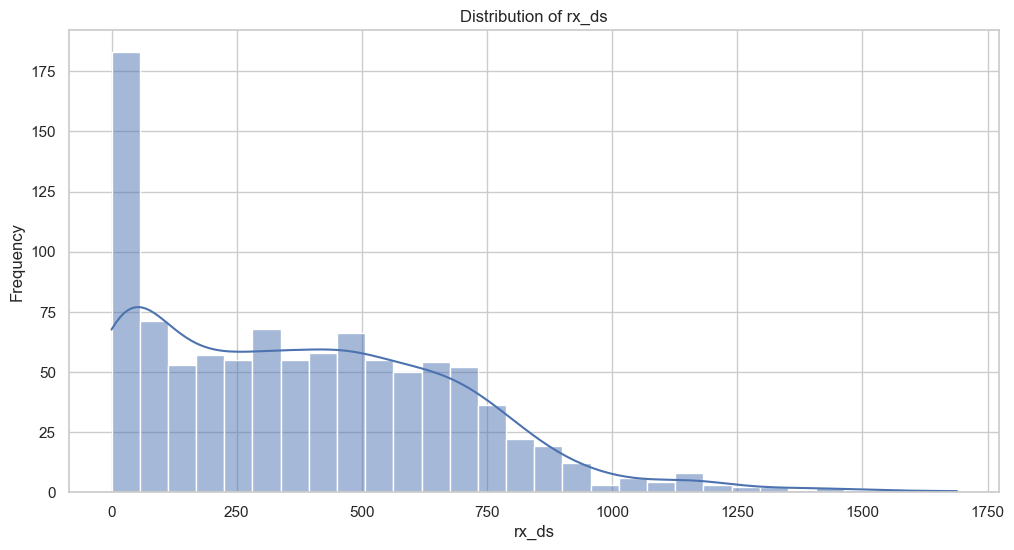

In [8]:
# Explore the distribution of 'rx_ds' for bucketing purposes
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['rx_ds'], bins=30, kde=True)
plt.title('Distribution of rx_ds')
plt.xlabel('rx_ds')
plt.ylabel('Frequency')
plt.show()

In [9]:
# Perform percentile-based bucketing for 'rx_ds'
df_features = df_cleaned.copy()
df_features['rx_ds_bucket'] = pd.qcut(
    df_cleaned['rx_ds'], 
    q=4, 
    labels=['Q1', 'Q2', 'Q3', 'Q4']
    )

In [10]:
df_features.head()

,OD,Low_inc,SURG,rx_ds,A,B,C,D,E,F,...,J,K,L,M,N,R,S,T,V,rx_ds_bucket
0,1,1,0,794,0,0,0,1,1,1,...,1,0,1,1,1,1,0,0,0,Q4
1,1,1,0,457,0,0,1,0,1,1,...,1,0,0,0,1,1,1,0,0,Q3
2,1,1,1,722,0,1,0,1,1,1,...,1,1,0,1,0,1,0,0,0,Q4
3,0,1,0,262,0,1,0,0,1,1,...,0,1,1,1,1,1,1,1,0,Q2
4,1,1,0,780,0,0,0,0,1,1,...,0,1,0,1,0,1,0,0,0,Q4


In [11]:
# Create a new feature that is the sum of all the binary features
binary_cols = [col for col in df_features.columns if col not in ['OD', 'rx_ds', 'rx_ds_bucket']]
df_features['binary_sum'] = df_features[binary_cols].sum(axis=1)

# Create a new feature that is the ratio of 'rx_ds' to the sum of binary features
df_features['rx_ds_to_binary_sum'] = df_features['rx_ds'] / df_features['binary_sum']

In [12]:
df_features.head()

,OD,Low_inc,SURG,rx_ds,A,B,C,D,E,F,...,L,M,N,R,S,T,V,rx_ds_bucket,binary_sum,rx_ds_to_binary_sum
0,1,1,0,794,0,0,0,1,1,1,...,1,1,1,1,0,0,0,Q4,11,72.181818
1,1,1,0,457,0,0,1,0,1,1,...,0,0,1,1,1,0,0,Q3,10,45.700000
2,1,1,1,722,0,1,0,1,1,1,...,0,1,0,1,0,0,0,Q4,12,60.166667
3,0,1,0,262,0,1,0,0,1,1,...,1,1,1,1,1,1,0,Q2,13,20.153846
4,1,1,0,780,0,0,0,0,1,1,...,0,1,0,1,0,0,0,Q4,8,97.500000


In [13]:
# Perform one-hot encoding for 'rx_ds_bucket'
df_one_hot = pd.get_dummies(df_features['rx_ds_bucket'], prefix='rx_ds_bucket')
df_features = pd.concat([df_features, df_one_hot], axis=1)
df_features.drop(['rx_ds_bucket'], axis=1, inplace=True)
df_features.head()

,OD,Low_inc,SURG,rx_ds,A,B,C,D,E,F,...,R,S,T,V,binary_sum,rx_ds_to_binary_sum,rx_ds_bucket_Q1,rx_ds_bucket_Q2,rx_ds_bucket_Q3,rx_ds_bucket_Q4
0,1,1,0,794,0,0,0,1,1,1,...,1,0,0,0,11,72.181818,0,0,0,1
1,1,1,0,457,0,0,1,0,1,1,...,1,1,0,0,10,45.700000,0,0,1,0
2,1,1,1,722,0,1,0,1,1,1,...,1,0,0,0,12,60.166667,0,0,0,1
3,0,1,0,262,0,1,0,0,1,1,...,1,1,1,0,13,20.153846,0,1,0,0
4,1,1,0,780,0,0,0,0,1,1,...,1,0,0,0,8,97.500000,0,0,0,1


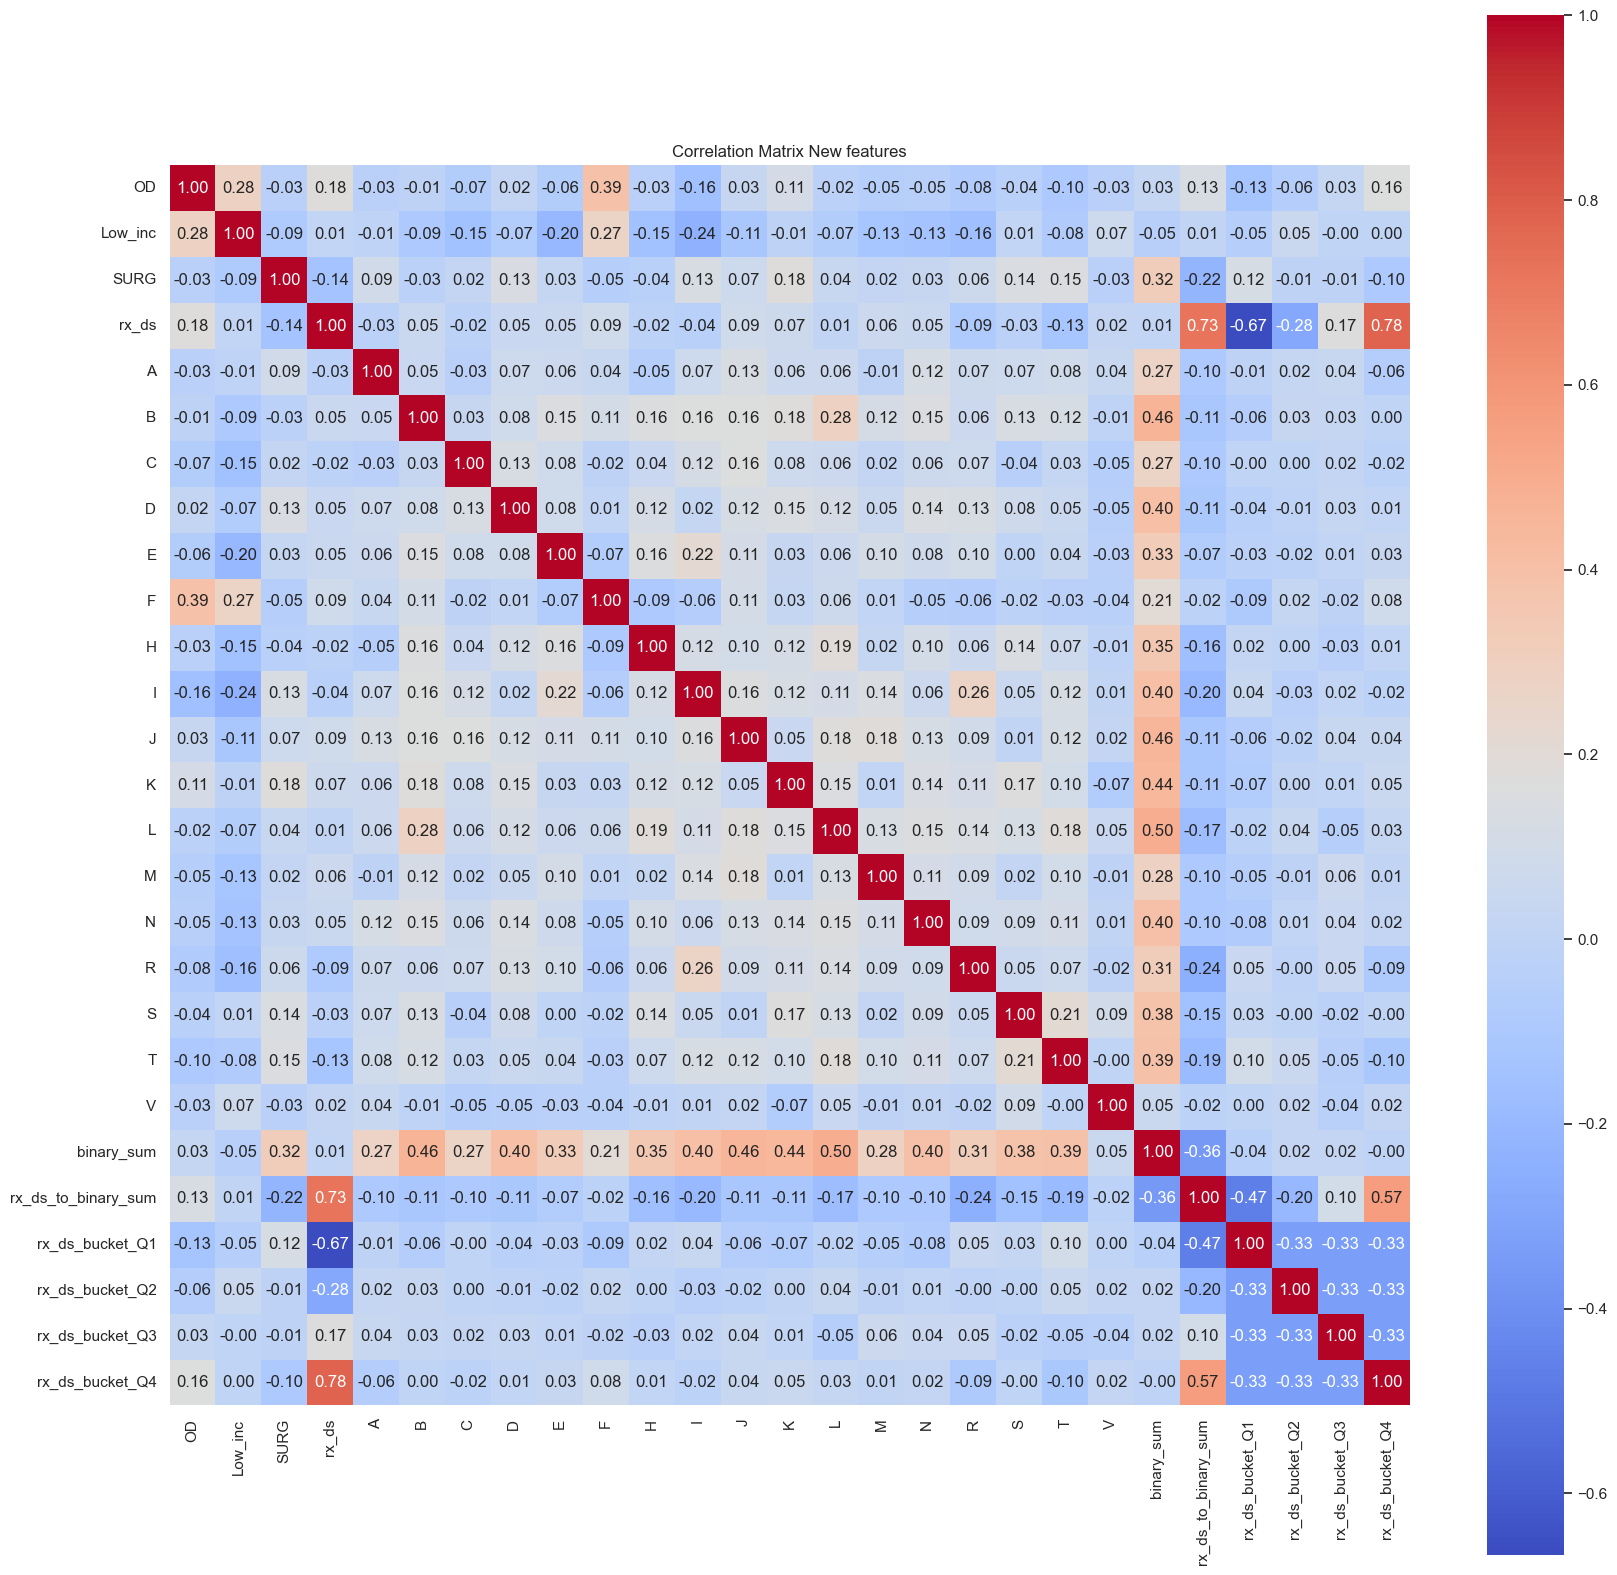

In [14]:
# Plotting the new correlation matrix using Seaborn
correlation_matrix = df_features.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix New features')
plt.show()

5. Model building

In [15]:
from sklearn.model_selection import train_test_split
df_model = df_features.copy()

# Removing 'OD' and 'rx_ds' columns from training data (rx_ds is not needed as it is bucketed)
X = df_model.drop(['OD', 'rx_ds'], axis=1)
y = df_model['OD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 25), (200, 25), (800,), (200,))

Baselining our model performance

In [16]:
# Baselining
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Majority Class (Zero-Rule Algorithm)
majority_baseline = DummyClassifier(strategy='most_frequent', random_state=42)
majority_baseline.fit(X_train, y_train)
y_pred_majority = majority_baseline.predict(X_test)
accuracy_majority = accuracy_score(y_test, y_pred_majority)

# Stratified Random Guessing
stratified_baseline = DummyClassifier(strategy='stratified', random_state=42)
stratified_baseline.fit(X_train, y_train)
y_pred_stratified = stratified_baseline.predict(X_test)
accuracy_stratified = accuracy_score(y_test, y_pred_stratified)

baseline_accuracies = pd.DataFrame({
    'Baseline Type': ['Majority Class Prediction', 'Stratified Random Guessing'],
    'Accuracy': [accuracy_majority, accuracy_stratified]
})

baseline_accuracies

,Baseline Type,Accuracy
0,Majority Class Prediction,0.705
1,Stratified Random Guessing,0.590


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve

# Initializing the model, Fitting and predicting
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [19]:
# # Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
fpr, tpr, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:,1])
roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:,1])

# Calculate Positive Predictive Value (PPV) and Negative Predictive Value (NPV)
TN, FP, FN, TP = conf_matrix_logistic.ravel()
ppv = TP / (TP + FP)
npv = TN / (TN + FN)
specificity_logistic = TN / (TN + FP)

# Store the results in a DataFrame for better presentation
results_logistic = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (PPV)', 'Recall (Sensitivity)', 'Specificity', 'F1 Score', 'Positive Predictive Value (PPV)', 'Negative Predictive Value (NPV)', 'ROC AUC'],
    'Logistic Regression': [accuracy_logistic, precision_logistic, recall_logistic, specificity_logistic, f1_logistic, ppv, npv, roc_auc_logistic]
})

results_logistic

,Metric,Logistic Regression
0,Accuracy,0.765000
1,Precision (PPV),0.666667
2,Recall (Sensitivity),0.406780
3,Specificity,0.914894
4,F1 Score,0.505263
5,Positive Predictive Value (PPV),0.666667
6,Negative Predictive Value (NPV),0.786585
7,ROC AUC,0.785912


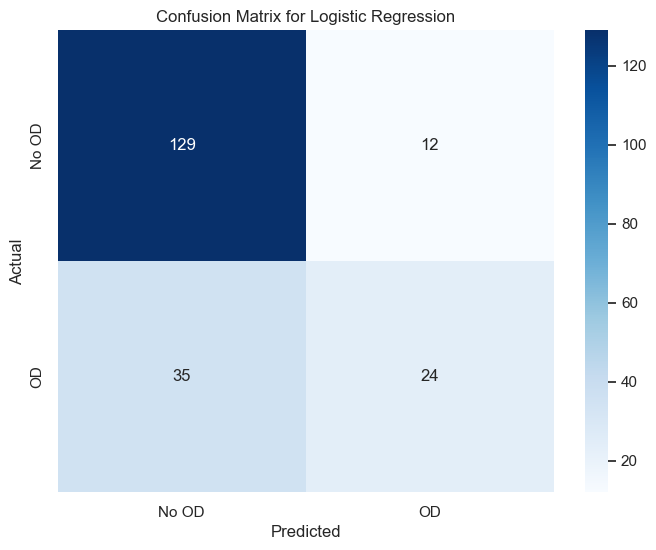

In [20]:
# Draw Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No OD', 'OD'], yticklabels=['No OD', 'OD'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

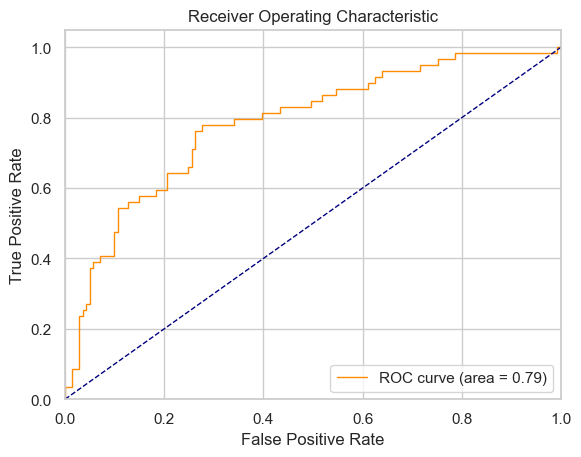

In [21]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label=f'ROC curve (area = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

6. Model improvement

In [22]:
# Logistic Regression with class_weight parameter
logistic_weighted = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logistic_weighted.fit(X_train, y_train)
y_pred_weighted = logistic_weighted.predict(X_test)
recall_weighted = recall_score(y_test, y_pred_weighted)
# Predicted probabilities for the positive class
y_probs = logistic_weighted.predict_proba(X_test)[:, 1]

# Calculate updated metrics
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
f1_score_weighted = f1_score(y_test, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test, y_probs)

# Calculate Positive and Negative Predictive Values
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
TP_weighted = conf_matrix_weighted[1, 1]
FP_weighted = conf_matrix_weighted[0, 1]
TN_weighted = conf_matrix_weighted[0, 0]
FN_weighted = conf_matrix_weighted[1, 0]
specificity_weighted = TN_weighted / (TN_weighted + FP_weighted)

ppv_weighted = TP_weighted / (TP_weighted + FP_weighted) if (TP_weighted + FP_weighted) != 0 else 0
npv_weighted = TN_weighted / (TN_weighted + FN_weighted) if (TN_weighted + FN_weighted) != 0 else 0

updated_metrics_weighted = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (PPV)', 'Recall (Sensitivity)', 'Specificity', 'F1 Score', 
               'Positive Predictive Value (PPV)', 'Negative Predictive Value (NPV)', 'ROC AUC'],
    'Weighted': [accuracy_weighted, precision_weighted, recall_weighted, specificity_weighted, 
              f1_score_weighted, ppv_weighted, npv_weighted, roc_auc_weighted],
    'Original': [accuracy_logistic, precision_logistic, recall_logistic, specificity_logistic, f1_logistic, ppv, npv, roc_auc_logistic]
})

updated_metrics_weighted

,Metric,Weighted,Original
0,Accuracy,0.710000,0.765000
1,Precision (PPV),0.505747,0.666667
2,Recall (Sensitivity),0.745763,0.406780
3,Specificity,0.695035,0.914894
4,F1 Score,0.602740,0.505263
5,Positive Predictive Value (PPV),0.505747,0.666667
6,Negative Predictive Value (NPV),0.867257,0.786585
7,ROC AUC,0.779661,0.785912


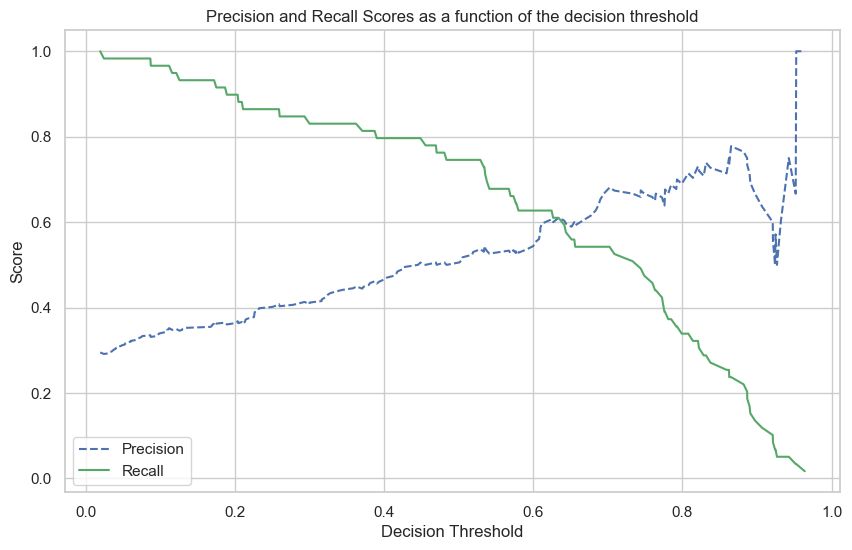

In [23]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall vs Threshold chart.
plt.figure(figsize=(10, 6))
plt.title("Precision and Recall Scores as a function of the decision threshold")
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.ylabel("Score")
plt.xlabel("Decision Threshold")
plt.legend(loc='best')
plt.show()

In [ ]:
# Redefine the function to find the optimal threshold for classification
def find_optimal_threshold(y_true, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    optimal_idx = np.argmax(tpr - fpr)
    return thresholds[optimal_idx]

# Find the optimal threshold using the function
optimal_threshold = find_optimal_threshold(y_test, y_probs)
optimal_threshold

In [22]:
# Custom threshold to make predictions
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

7. Interpretability

In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logistic_weighted.coef_[0]
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# SHAP (SHapley Additive exPlanations)
import shap

explainer = shap.LinearExplainer(logistic_weighted, X_train)
shap_values = explainer.shap_values(X_test)
shap.initjs()

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
# Identifying positive or negative instances
for i in range(5):
    print(f'Instance {i}:')
    print(f'Probability of OD: {y_probs[i]:.4f}')
    print(f'Predicted class: {y_pred_optimal[i]}')
    print(f'Actual class: {y_test.iloc[i]}')
    print('-' * 50)

In [ ]:
# High confidence negative prediction
shap.force_plot(explainer.expected_value, shap_values[3,:], X_test.iloc[3,:])

In [ ]:
# High confidence positive prediction
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])

In [ ]:
# High confidence postisive but non-OD
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[1,:])

In [30]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Initialize the explainer with your existing training data
explainer = LimeTabularExplainer(X_train.to_numpy(), 
                                 training_labels=y_train, 
                                 feature_names=X_train.columns.tolist(), 
                                 class_names=['Not Addicted', 'Addicted'], 
                                 mode='classification')

In [ ]:
# High confidence negative prediction
exp = explainer.explain_instance(X_test.iloc[3].to_numpy(), logistic_weighted.predict_proba)
exp.show_in_notebook()

In [ ]:
# High confidence positive prediction
exp = explainer.explain_instance(X_test.iloc[2].to_numpy(), logistic_weighted.predict_proba)
exp.show_in_notebook()

In [ ]:
# High confidence postisive but non-OD
exp = explainer.explain_instance(X_test.iloc[1].to_numpy(), logistic_weighted.predict_proba)
exp.show_in_notebook()

8. Fairness

In [ ]:
# Demographic Parity & Disparate Impact

# Create a DataFrame to hold the true and predicted labels along with the protected attribute
fairness_df = pd.DataFrame({'True_Labels': y_test, 'Predicted_Labels': y_pred_optimal, 'Low_inc': X_test['Low_inc']})

# Calculate the selection rate for the protected and non-protected groups
selection_rate_protected = fairness_df[(fairness_df['Low_inc'] == 1)]['Predicted_Labels'].mean()
selection_rate_non_protected = fairness_df[(fairness_df['Low_inc'] == 0)]['Predicted_Labels'].mean()

# Calculate Demographic Parity
demographic_parity_difference = selection_rate_protected - selection_rate_non_protected
demographic_parity_ratio = selection_rate_protected / selection_rate_non_protected if selection_rate_non_protected != 0 else float('inf')

pd.DataFrame({
    'Metric': ['selection_rate_protected (Favorable Outcome)', 'selection_rate_non_protected (Favorable Outcome)', 'demographic_parity_difference', 'demographic_parity_ratio (Disparate Impact)'],
    'Value': [selection_rate_protected, selection_rate_non_protected, demographic_parity_difference, demographic_parity_ratio],
})

In [ ]:
# Equalized Odds

# Calculate True Positive Rates (Recall) for the protected and non-protected groups
TPR_protected = fairness_df[(fairness_df['Low_inc'] == 1) & (fairness_df['True_Labels'] == 1)]['Predicted_Labels'].mean()
TPR_non_protected = fairness_df[(fairness_df['Low_inc'] == 0) & (fairness_df['True_Labels'] == 1)]['Predicted_Labels'].mean()

# Calculate False Positive Rates for the protected and non-protected groups
FPR_protected = fairness_df[(fairness_df['Low_inc'] == 1) & (fairness_df['True_Labels'] == 0)]['Predicted_Labels'].mean()
FPR_non_protected = fairness_df[(fairness_df['Low_inc'] == 0) & (fairness_df['True_Labels'] == 0)]['Predicted_Labels'].mean()

# Calculate Equalized Odds Differences
equalized_odds_difference_TPR = TPR_protected - TPR_non_protected
equalized_odds_difference_FPR = FPR_protected - FPR_non_protected

pd.DataFrame({
    'Metric': ['TPR_protected (Recall)', 'TPR_non_protected', 'FPR_protected', 'FPR_non_protected', 'equalized_odds_difference_TPR', 'equalized_odds_difference_FPR'],
    'Value': [TPR_protected, TPR_non_protected, FPR_protected, FPR_non_protected, equalized_odds_difference_TPR, equalized_odds_difference_FPR],
})
